# Jupyter notebooks

This is an IPython notebook, running a python kernel underneath.

The state of the python interpreter, all the variables, class and function definitions are preserved between the cell executions. In case you want to reset that state (e.g. to check whether your code works corretrly when the cells are executed in the direct order), go to `Kernel`->`Restart kernel...`

The most useful features of Jupyter:
 - contextual help (hit `TAB`)
 - quick access to documentation (`SHIFT+TAB`)

# Numpy and vectorized computing

Almost any machine learning model requires some computational heavy lifting usually involving linear algebra problems. Unfortunately, raw python is terrible at this because each operation is interpreted at runtime.

So instead, we'll use `numpy` - a library that lets you run blazing fast computation with vectors, matrices and other tensors. The god oject here is `numpy.ndarray`:

**please keep running all the code cells as you read**

In [1]:
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [2]:
# Your turn: compute half-products of a and b elements (halves of products)

def half_product(a, b):
    return (a * b) / 2

Make sure the automatic checks are passed:

In [3]:
np.testing.assert_almost_equal(
    half_product(
        np.array([ 1.3549439 , -1.69765972,  0.32111273, -0.2703243 , -0.38928596]),
        np.array([-1.50693732,  0.69443195,  0.90948151,  1.1717395 ,  1.4069652 ])
    ),
    np.array([-1.02090776, -0.58945457,  0.14602305, -0.15837483, -0.2738559 ])
)

print("a =", a)
print("b =", b)
print("a * b / 2 = ", half_product(a, b))

a = [1 2 3 4 5]
b = [5 4 3 2 1]
a * b / 2 =  [2.5 4.  4.5 4.  2.5]


In [4]:
# compute elementwise quotient between squared a and (b plus 1), return the result

def a_squared_over_b_plus_1(a, b):
    return a ** 2 / (b + 1)

Make sure the automatic checks are passed:

In [5]:
np.testing.assert_almost_equal(
    a_squared_over_b_plus_1(
        np.array([ 1.3549439 , -1.69765972,  0.32111273, -0.2703243 , -0.38928596]),
        np.array([-1.50693732,  0.69443195,  0.90948151,  1.1717395 ,  1.4069652 ])
    ),
    np.array([-3.62149895,  1.70089364,  0.05400072,  0.03364825,  0.06296043])
)

print("a = ", a)
print("b = ", b)
print("a**2 / (b + 1)", a_squared_over_b_plus_1(a, b))

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a**2 / (b + 1) [ 0.16666667  0.8         2.25        5.33333333 12.5       ]


---------

There's a number of functions to create arrays of zeros, ones, ascending/descending numbers etc.:

In [6]:
np.zeros(shape=(3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
np.ones(shape=(2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
np.arange(3, 15, 2.5) # start, stop, step

array([ 3. ,  5.5,  8. , 10.5, 13. ])

In [9]:
np.linspace(0, 10, 11) # divide [0, 10] interval into 11 points

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

You can easily reshape arrays:

In [10]:
np.arange(24).reshape(2, 3, 4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

Array dimensions are automatically broadcast when doing mathematical operations:

In [11]:
np.arange(3).reshape(1, 3) - np.arange(3).reshape(3, 1)

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

You can use broadcasting in many ways. E.g. to raise a matrix to a set of powers elementwise:

In [12]:
A = np.array([
    [1, 2],
    [3, 5]
])
powers = np.arange(1, 5)

A.reshape(1, 2, 2)**powers.reshape(4, 1, 1)

array([[[  1,   2],
        [  3,   5]],

       [[  1,   4],
        [  9,  25]],

       [[  1,   8],
        [ 27, 125]],

       [[  1,  16],
        [ 81, 625]]])

There is also a number of ways to stack arrays together. E.g. `np.concatenate` joins arrays along **an existing** axis:

In [13]:
matrix1 = np.arange(18).reshape(6, 3) # array of shape (6, 3)
matrix2 = -np.arange(12).reshape(6, 2) # array of shape (6, 2)

np.concatenate([matrix1, matrix2], axis=1) # result of shape (6, 5)

array([[  0,   1,   2,   0,  -1],
       [  3,   4,   5,  -2,  -3],
       [  6,   7,   8,  -4,  -5],
       [  9,  10,  11,  -6,  -7],
       [ 12,  13,  14,  -8,  -9],
       [ 15,  16,  17, -10, -11]])

While `np.stack` adds **a new dimension** to the result:

In [14]:
np.stack([
    np.arange(5), # array of shape (5,)
    np.linspace(0, 1, 5) # array of shape (5,)
], axis=1) # result of shape (5, 2)

array([[0.  , 0.  ],
       [1.  , 0.25],
       [2.  , 0.5 ],
       [3.  , 0.75],
       [4.  , 1.  ]])

Any matrix can be transposed easily:

In [15]:
print(matrix2)
print('---')
print(matrix2.T)

[[  0  -1]
 [ -2  -3]
 [ -4  -5]
 [ -6  -7]
 [ -8  -9]
 [-10 -11]]
---
[[  0  -2  -4  -6  -8 -10]
 [ -1  -3  -5  -7  -9 -11]]


In [16]:
print('matrix2.shape =', matrix2.shape)
print('matrix2.T.shape =', matrix2.T.shape)

matrix2.shape = (6, 2)
matrix2.T.shape = (2, 6)


In [17]:
# Your turn!
# Using the methods you've learned (array initialization,
# reshaping and concatenation), write a function that composes
# and returns the following matrix:
#
#              0   7  14  21  28  0  0
#              1   8  15  22  29  0  0
#              2   9  16  23  30  0  0
#              3  10  17  24  31  3  3
#              4  11  18  25  32  3  3
#              5  12  19  26  33  3  3
#              6  13  20  27  34  3  3


def compose_matrix():
    matrix_1 = np.arange(35).reshape(5, 7).T
    matrix_2 = np.concatenate([np.zeros(shape=(3,2)), 3*np.ones(shape=(4, 2))], axis=0)
    return np.concatenate([matrix_1, matrix_2], axis=1)

In [18]:
np.testing.assert_equal(
    compose_matrix(),
    np.array([[0,   7,  14,  21,  28,  0,  0],
              [1,   8,  15,  22,  29,  0,  0],
              [2,   9,  16,  23,  30,  0,  0],
              [3,  10,  17,  24,  31,  3,  3],
              [4,  11,  18,  25,  32,  3,  3],
              [5,  12,  19,  26,  33,  3,  3],
              [6,  13,  20,  27,  34,  3,  3]])
)

Linear algebra:

In [19]:
a = np.arange(3)
B = np.arange(12).reshape(4, 3)
print("a =", a)
print("B =\n", B)
print("Dot product (a*a):", a @ a) # or: np.dot(a, a)
print("Matrix-vector (B*a):", B @ a) # or: np.matmul(B, a)
print("Matrix-matrix (B*B.T):\n", B @ B.T) # or: np.matmul(B, B.T)

a = [0 1 2]
B =
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Dot product (a*a): 5
Matrix-vector (B*a): [ 5 14 23 32]
Matrix-matrix (B*B.T):
 [[  5  14  23  32]
 [ 14  50  86 122]
 [ 23  86 149 212]
 [ 32 122 212 302]]


There's also a bunch of pre-implemented operations including logarithms, trigonometry and aggregations.

In [20]:
a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element
print("numpy.dot(a,b) = ", np.dot(a, b))      # dot product. Also used for matrix/tensor multiplication
print("numpy.unique(['male','male','female','female','male']) = ", np.unique(['male','male','female','female','male']))

# and tons of other stuff. see http://bit.ly/2u5q430 .

numpy.sum(a) =  15
numpy.mean(a) =  3.0
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.dot(a,b) =  35
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


In [21]:
# most of this functions are also implemented as members of numpy arrays, e.g.:
print('a.min() =', a.min())
print('a.mean() =', a.mean())

a.min() = 1
a.mean() = 3.0


# pandas

Pandas is a library that helps you load the data, prepare it and perform some lightweight analysis. It is built ontop of numpy. The god object here is the pandas.DataFrame - a 2d table with batteries included.

In the cell below we use it to read the data on the infamous Titanic shipwreck.

In [22]:
# check out the file contents:
!head ../../data/1.1.4-DataHandling/train.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [23]:
import pandas as pd
data = pd.read_csv("../../data/1.1.4-DataHandling/train.csv", index_col='PassengerId') # this yields a pandas.DataFrame

In [24]:
# Selecting rows
head = data[:10]
head

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### About the data
Here's some of the columns

 - Name - a string with person's full name
 - Survived - 1 if a person survived the shipwreck, 0 otherwise.
 - Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
 - Sex - a person's gender
 - Age - age in years, if available
 - Sibsp - number of siblings on a ship
 - Parch - number of parents on a ship
 - Fare - ticket cost
 - Embarked - port where the passenger embarked
   - C = Cherbourg; Q = Queenstown; S = Southampton

In [25]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [26]:
# select a single row
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [27]:
# select a single column.
ages = data["Age"]
print(ages[:10])  # alternatively: data.Age

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [28]:
# select several columns and rows at once
data.loc[5:10, ("Fare", "Pclass")]    # alternatively: data[["Fare","Pclass"]].loc[5:10]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


Some columns contain NaN values - this means that there is no data there. For example, passenger #5 has unknown age. To simplify the future data analysis, we'll replace NaN values by using pandas fillna function.

**Important note: we do this so easily because it's a tutorial. In general, you think twice before you modify data like this.**

In [29]:
data.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [30]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [31]:
data.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                  29.6991
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

The functions `max`, `min`, `mean`, etc. are also available:

In [32]:
print("Max ticket price: ", data["Fare"].max())

print("\nThe guy who paid the most:\n", data.loc[data['Fare'].idxmax()])

Max ticket price:  512.3292

The guy who paid the most:
 Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


Boolean operations produce boolean arrays:

In [33]:
data['Age'] < 30

PassengerId
1       True
2      False
3       True
4      False
5      False
       ...  
887     True
888     True
889     True
890     True
891    False
Name: Age, Length: 891, dtype: bool

Boolean indexing comes very handy for quickly selecting subsets of data:

In [34]:
print("data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)") # select male children
data.loc[(data['Age'] < 18) & (data['Sex'] == 'male')]

data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S


# Plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

Just like python itself, matplotlib has an awesome tendency of keeping simple things simple while still allowing you to write complicated stuff with convenience (e.g. super-detailed plots or custom animations).

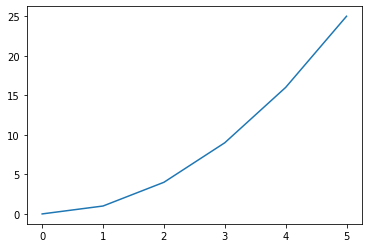

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# line plot
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25]);

x = [0 1 2 3 4]
x**2 = [ 0  1  4  9 16]
plotting x**2 vs x:


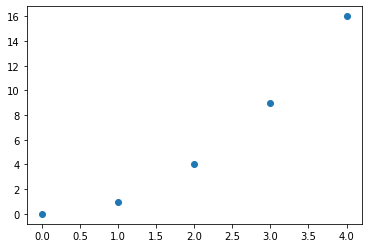

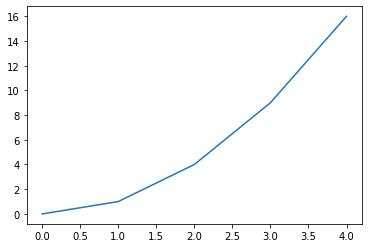

In [36]:
#scatter-plot
x = np.arange(5)
print("x =", x)
print("x**2 =", x**2)
print("plotting x**2 vs x:")
plt.scatter(x, x**2)

plt.show()  # show the first plot and begin drawing next one
plt.plot(x, x**2);

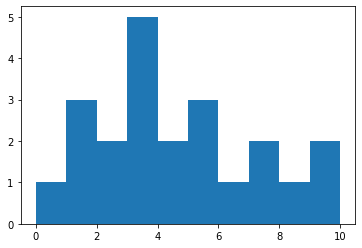

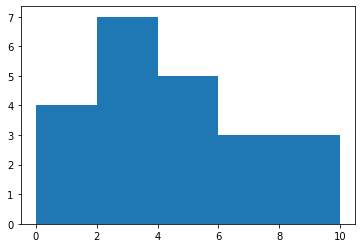

In [37]:
# histogram - showing data density
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()

plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10], bins=5);

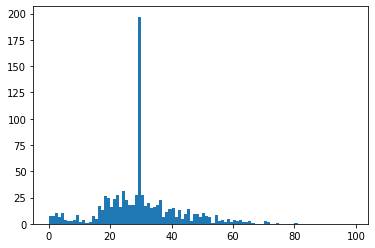

(array([164., 564., 137.,  25.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,  940.,  960.,  980., 1000.]),
 <a list of 50 Patch objects>)

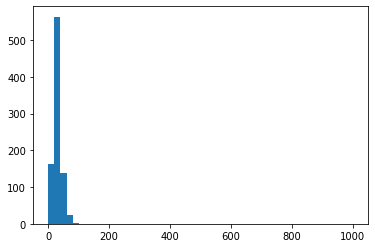

In [38]:
# plot a histogram of age and a histogram of ticket fares on separate plots

ages = data["Age"]
fares = data["Fare"]

plt.hist(ages, bins=np.arange(100))
plt.show()
plt.hist(ages, bins=np.linspace(0, 1000, 51))

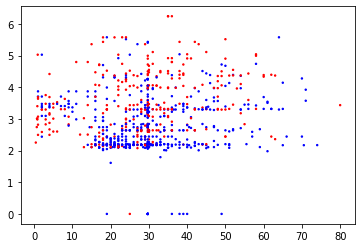

In [39]:
plt.scatter(data['Age'],
            np.log1p(data['Fare']),
            c=data['Survived'], # maps different colors depending on whether a person survived
            s=2, # change the marker size
            cmap='bwr'); # select colormap

# machine learning with scikit-learn

Scikit-learn is *the* tool for simple machine learning pipelines.

It's a single library that unites a whole bunch of models under the common interface:

 - Create: **`model = sklearn.whatever.ModelNameHere(parameters_if_any)`**
 - Train: **`model.fit(X,y)`**
 - Predict: **`model.predict(X_test)`**

It also contains utilities for feature extraction, quality estimation or cross-validation.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = data[['Age', 'SibSp', 'Sex']].copy()
features['Sex'].replace({'male': 1,'female': 0}, inplace=True)
features['Age'].fillna(features['Age'].mean())

scaler = StandardScaler()
features = scaler.fit_transform(features)

answers = data["Survived"]

best_k, best_score = -1, -1

for k in range(1, 51):
    model = KNeighborsClassifier(k)
    model.fit(features[:-100], answers[:-100])
    test_predictions = model.predict(features[-100:])
    score = accuracy_score(answers[-100:], test_predictions)

    if best_score <= score:
        best_score = score
        best_k = k

model = KNeighborsClassifier(best_k)

best_k, best_score

(27, 0.85)

**Final quest:** tune n_neighbors and add more features to achieve accuracy of at least 0.75

**Hint 1:** for string features like "Sex" or "Embarked" you will have to compute some kind of numeric representation. For example, 1 if male and 0 if female or vice versa

**Hint 2:** features like "Age" contain NaN values. You can replace them with `replaced = data["Age"].fillna(some_number)`.

In [46]:
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
score = accuracy_score(answers[-100:], test_predictions)
assert score >= 0.75, score

In [47]:
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
score = accuracy_score(answers[-100:], test_predictions)
assert score >= 0.8, score

In [48]:
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
score = accuracy_score(answers[-100:], test_predictions)
assert score >= 0.85, score

# Bonus part

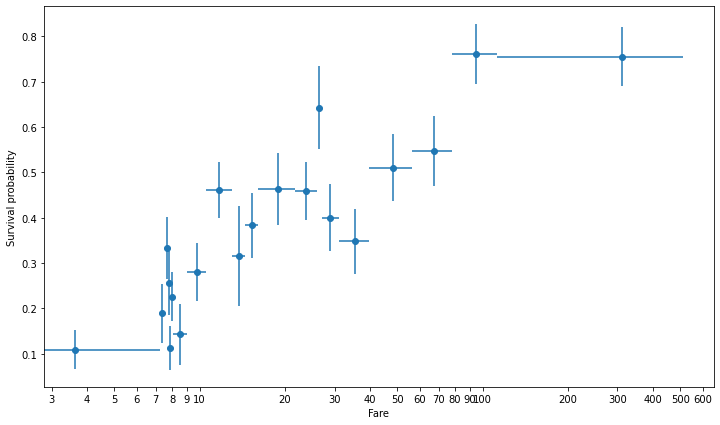

In [49]:
from matplotlib.ticker import ScalarFormatter

data['qFare'] = pd.qcut(data.Fare, 20)

sur_vs_price = data.groupby('qFare').Survived.mean()
sur_vs_price_e = data.groupby('qFare').Survived.std() \
                        / data.groupby('qFare').Survived.count()**0.5

fig = plt.figure(figsize=(12, 7))
plt.errorbar(x=sur_vs_price.index.categories.mid,
             y=sur_vs_price.values,
             yerr=sur_vs_price_e.values,
             xerr=(
                 pd.IntervalIndex(sur_vs_price.index).right - 
                 pd.IntervalIndex(sur_vs_price.index).left
               ) / 2,
             fmt='o')
plt.gca().set_xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().set_xticks(
              list(range(3, 10)) +
              list(range(10, 100, 10)) +
              list(range(100, 700, 100))
            )

plt.xlabel('Fare')
plt.ylabel('Survival probability');